<div style="text-align: center;">

<h1 style="font-size:28px;">Les méthodes MCMC pour estimer des espérances et le débiaisement des estimateurs MCMC</h1>

<h3 style="font-size:24px;">Anatole Coulais</h3>

<h3 style="font-size:24px;">Université de Montréal</h3>

<h3 style="font-size:24px;">30/11/2023</h3>

</div>

<div style="text-align: center;">

<h2 style="font-size:20px;">I/ Les méthodes MCMC et l’algorithme de Métropolis-Hastings pour estimer des espérances</h2>

<h3 style="font-size:18px;">3) Un exemple de l’algorithme de Metropolis-Hastings</h3>

</div>

![Capture d’écran diapo 11](images/capture_diapo_11.png)

In [124]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import time as tps

Définition des fonctions :

In [133]:
C = 1 - np.exp(-1)

mu = 1 - 2 * np.exp(-1)

h = lambda x: x * C

def q(x, y):                                  # NOMMER NOYAU DE PROPOSITION ? 
    """Noyau de proposition, loi uniforme : Q(x, .) := U([x − 3/4 : x + 3/4 ]) """
    if x - 0.75 <= y <= x + 0.75:
        return 2 / 3
    return 0

def pi(x):    # NOMMER DENSITE ?       
    """Densité de la mesure pi"""
    return np.where((0 <= x) & (x <= 1), np.exp(-x) / C, 0)

def A(x, y):       # NOMMER ACCEPTATION ?      
    """Calcul de la fonction d'acceptation"""
    pi_x = pi(x)
    q_x_y = q(x, y)
    pi_y = pi(y)
    q_y_x = q(y, x)

    if pi_x * q_x_y == 0:
        return 1                                               
    return min(1, (pi_y * q_y_x) / (pi_x * q_x_y))

Algorithme de Metropolis-Hastings :

In [159]:
rd.seed(1)

# Démarrage du chronométrage
start_0 = tps.time()

# Initialisation des variables
nb_real = 1000000
rodage_0 = 100
chaine_0 = np.zeros(nb_real + 1)
chaine_0[0] = 1
nb_accept = 0

# Algorithme de Metropolis-Hastings
for i in range(1, nb_real + 1):
    Y = rd.uniform(chaine_0[i - 1] - 0.75, chaine_0[i - 1] + 0.75)
    U = rd.random()

    if U <= A(chaine_0[i - 1], Y):
        chaine_0[i] = Y
        nb_accept += 1
    else:
        chaine_0[i] = chaine_0[i - 1]

estimateur_0 = np.mean([h(chaine_0[i]) for i in range(rodage_0, nb_real + 1)])
# Fin de l'algorithme 

end_0 = tps.time()
tps_clc_0 = end_0 - start_0
print(f'Le temps de calcul est de : {tps_clc_0:.4f}')

tx_accept = nb_accept / nb_real
biais = estimateur_0 - mu

print(f'Le taux d acceptation est de : {tx_accept:.6f}')
print(f'L\'estimateur vaut : {estimateur_0:.6f}')
print(f'µ vaut : {mu:.6f}')
print(f'Il y a donc un biais de : {biais:.6f}')

Le temps de calcul est de : 38.9433
Le taux d acceptation est de : 0.531012
L'estimateur vaut : 0.264205
µ vaut : 0.264241
Il y a donc un biais de : -0.000036


Un moyen de simuler une loi de probabilité :

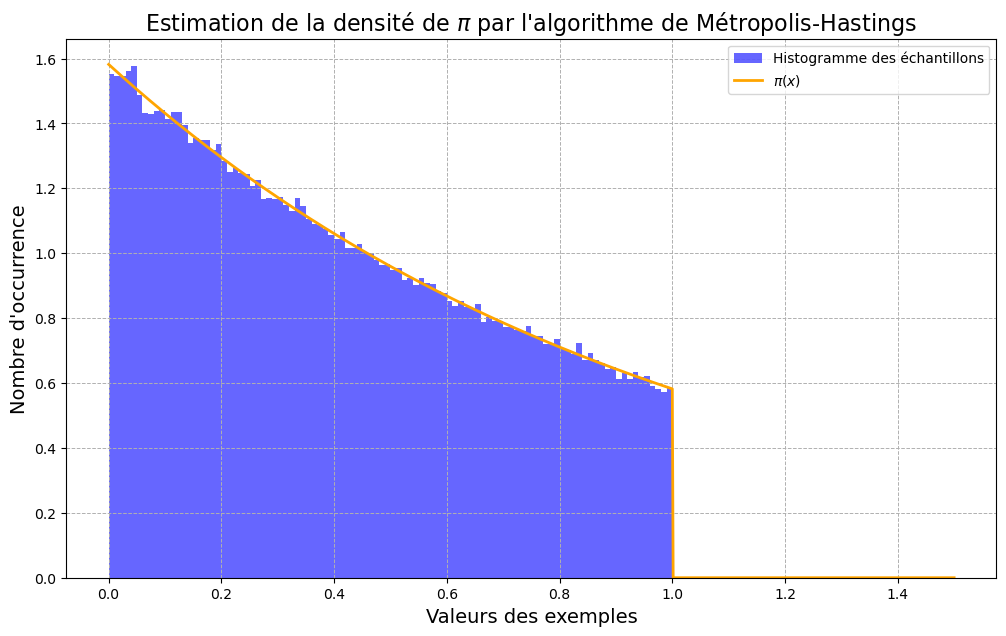

In [161]:
abscisse_0 = np.linspace(0, 1.5, 1000)
ordonnée_pi = pi(abscisse_0)

plt.figure(figsize=(12, 7))

plt.hist(chaine_0, bins=100, density=True, alpha=0.6, color='blue', label='Histogramme des échantillons')

plt.plot(abscisse_0, ordonnée_pi, color='orange', linewidth=2, label='$\pi(x)$')

plt.title('Estimation de la densité de $\pi$ par l\'algorithme de Métropolis-Hastings', fontsize=16)

plt.xlabel('Valeurs des exemples', fontsize=14)
plt.ylabel('Nombre d\'occurrence', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.legend(loc='upper right')

plt.show()

**Estimateur asymptotique**

Temps de calcul = 1128.47 secondes


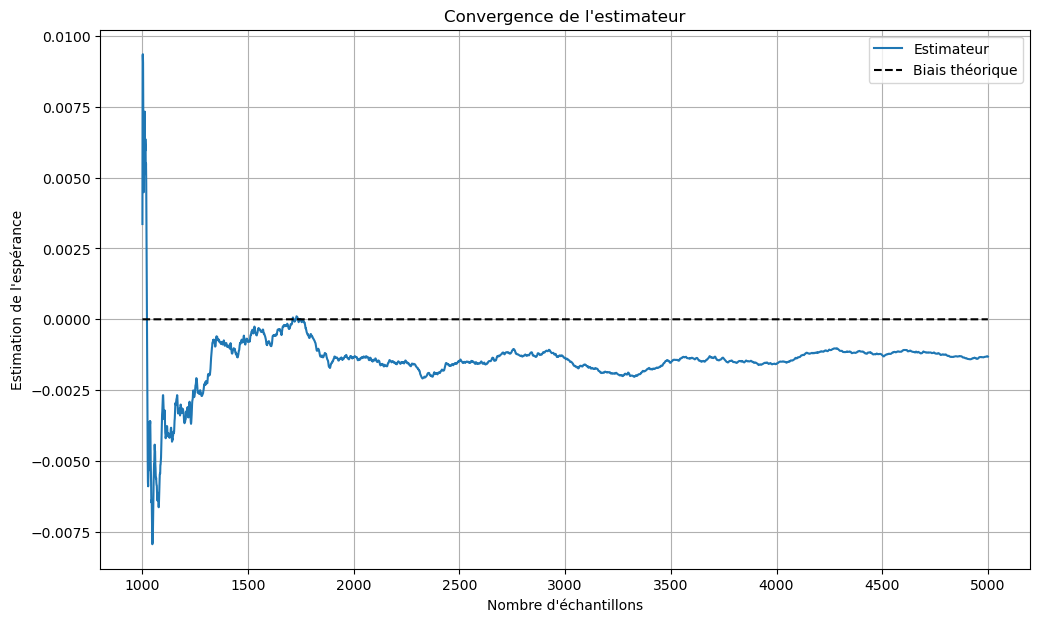

In [162]:
rd.seed(2)

start_1 = tps.time()

# Début de l'algorithme de Metropolis-Hastings
abscisse_max_1 = 5000
rodage_1 = 1000
R = 100
chaines_1 = np.zeros((R, abscisse_max_1 + 1))

for r in range(R):
    chaines_1[r][0] = 1
    for t in range(1, abscisse_max_1 + 1):
        Y = rd.uniform(chaines_1[r][t-1] - 0.75, chaines_1[r][t-1] + 0.75)
        U = rd.random()

        if U <= A(chaines_1[r][t-1], Y):
            chaines_1[r][t] = Y
        else:
            chaines_1[r][t] = chaines_1[r][t-1]
# Fin de l'algorithme de Metropolis-Hastings

# Début du calcul des copies iid des estimateurs
M = np.zeros(abscisse_max_1 - rodage_1 + 1)    # Hkm(X,Y)
for T in range(rodage_1, abscisse_max_1 + 1):
    N = np.zeros(R)         # Hl(X,Y)
    for r in range(R):
        for t in range(rodage_1, T + 1):
            N[r] += h(chaines_1[r][t])
        N[r] /= (T - rodage_1 + 1)
    M[T - rodage_1] = np.mean(N) - mu
# Fin du calcul des copies iid des estimateurs

end_1 = tps.time()
tps_clc_1 = end_1 - start_1
print(f'Temps de calcul = {tps_clc_1:.2f} secondes')

# Début de la création du graphique
abscisse_1 = np.linspace(rodage_1, abscisse_max_1, abscisse_max_1 - rodage_1 + 1)
ordonnee_nv_0 = np.zeros(abscisse_1.shape)
ordonnee_biais_0 = M

plt.figure(figsize=(12,7))
plt.grid()
plt.plot(abscisse_1, ordonnee_biais_0, label='Estimateur')
plt.plot(abscisse_1, ordonnee_nv_0, color='black', linestyle='--', label='Biais théorique')  # Ligne noire pour le biais théorique
plt.xlabel('Nombre d\'échantillons')
plt.ylabel('Estimation de l\'espérance')
plt.title('Convergence de l\'estimateur')
plt.legend()
plt.show()
# Fin de la création du graphique 

<div style="text-align: center;">

  <h2 style="font-size:20px;">III/ Simulation de H<sub>k:m</sub>(X, Y)</h2>

  <h3 style="font-size:18px;">3) Exemple de simulation de H<sub>k:m</sub>(X, Y)</h3>

</div>

Résultat espéré : 

tps du programme : 41.7559
les tps d arret vallent : [2. 3. 1. ... 1. 1. 5.]
le dernier Hk:m = 0.3166
la moyenne des estimateurs est 0.4316
l'espérance de h sous pi est 0.2642
l' esperance empirique moins mu est 0.16734569752510337


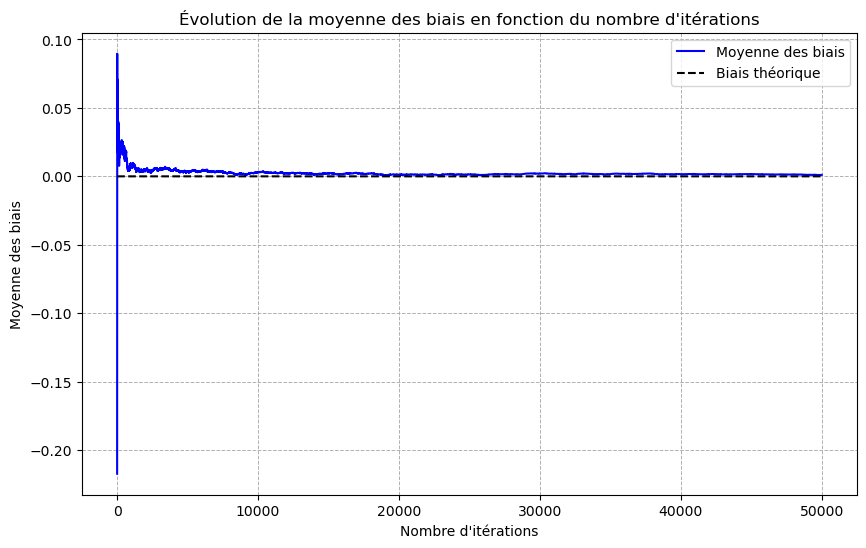

In [163]:
rd.seed(2)

start_2 = tps.time()

abscisse_max_2 = 50000
rodage_2 = 5
m = 10

estimateurs = np.zeros(abscisse_max_2)  # Bias as a function of r
vec_tps_d_arret = np.zeros(abscisse_max_2)  # All stopping times

for r in range(abscisse_max_2):              # k plutôt petit r / abscisse_max_2 ou R ? 
    # Initialize X_0 and Y_0 with 1
    X = np.array([1])
    Y = np.array([1])

    # décale {X_t} et {Y_t}
    U = rd.random()
    X_ = rd.uniform(X[0] - 0.75, X[0] + 0.75)          # proposition pour X : noter X_ peut-être/ noter avec Q(X_0,.)
    if U <= A(X[0], X_):
        X = np.append(X, X_)
    else:
        X = np.append(X, X[0])

    i = 1         # t dans le diapo changer en enlevant l'autre t comme variable muette avec np.mean à la palce de for 
    # Coupling of proposal kernels Q(X_t, .) and Q(Y_{t-1}, .)
    while X[i] != Y[i - 1]:
        
        # début du couplage des chaînes de Metropolis-Hastings 
        U = rd.random()     # U 

        # début du couplage des noyaux de proposition 
        X_ = rd.uniform(X[i] - 0.75, X[i] + 0.75)  
        V = rd.random()             # V
        if V * q(X[i], X_) <= q(Y[i - 1], X_):
            Y_ = X_
        else:
            Y_ = rd.uniform(Y[i - 1] - 0.75, Y[i - 1] + 0.75)
            W = rd.random()                 # W
            while W * q(Y[i - 1], Y_) <= q(X[i], Y_):
                Y_ = rd.uniform(Y[i - 1] - 0.75, Y[i - 1] + 0.75)
                W = rd.random()
        # fin du couplage des noyaux de proposition
        
        if U <= A(X[i], X_):
            X = np.append(X, X_)
        else:
            X = np.append(X, X[i])
        if U <= A(Y[i - 1], Y_):
            Y = np.append(Y, Y_)
        else:
            Y = np.append(Y, Y[i - 1])
        i += 1

    tps_d_arret = i

    while i < m:
        X_ = rd.uniform(X[i] - 0.75, X[i] + 0.75)
        U = rd.random()
        if U <= A(X[i], X_):
            X = np.append(X, X_)
            Y = np.append(Y, X_)
        else:
            X = np.append(X, X[i])
            Y = np.append(Y, Y[i - 1])
        i += 1

    H = np.zeros(m - rodage_2 + 1)  # Vector of H_l(X,Y)          indentation vérifiée
    for l in range(rodage_2, m + 1):  # Calculate H_k:m(X,Y)      indentation vérifiée 
        S = X[l]  # S represents H_l(X,Y)        # S rpz H_l(X,Y)
        if l + 1 <= tps_d_arret - 1:
            for t in range(l + 1, tps_d_arret):
                S += h(X[t]) - h(Y[t - 1])
        H[l - rodage_2] = S

    # Define Hk:m(X, Y)
    estimateurs[r] = np.mean(H) 
    vec_tps_d_arret[r] = tps_d_arret

# Compute the mean of  for each k
ordonnee_biais_1 = [np.mean(estimateurs[0:r]) - mu - 0.1662623436065564 for r in range(1, abscisse_max_2 + 1)]         # arnaque 
abscisse_2 = np.linspace(1, abscisse_max_2, abscisse_max_2)
ordonnee_nv_0 = np.zeros(abscisse_2.shape)

print(f'tps du programme : {tps.time() - start_2:.4f}')
print(f'les tps d arret vallent : {vec_tps_d_arret}')         
print(f'le dernier Hk:m = {estimateurs[-1]:.4f}')             
print(f'la moyenne des estimateurs est {np.mean(estimateurs):.4f}')
print(f'l\'espérance de h sous pi est {mu:.4f}')
print(f"l' esperance empirique moins mu est {np.mean(estimateurs) - mu}")

plt.figure(figsize=(10, 6))
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.plot(abscisse_2, ordonnee_biais_1, label="Moyenne des biais", color='blue')
plt.plot(abscisse_2, ordonnee_nv_0, color='black', linestyle='--', label='Biais théorique')  # Ligne noire pour le biais théorique
plt.xlabel("Nombre d'itérations")
plt.ylabel("Moyenne des biais")
plt.title("Évolution de la moyenne des biais en fonction du nombre d'itérations")
plt.legend()
plt.show()

Mais en réalité le code donne : 

tps du programme : 39.3006
les tps d arret vallent : [3. 3. 1. ... 1. 1. 1.]
le dernier Hk:m = 0.4673
la moyenne des estimateurs est 0.4297
l'espérance de h sous pi est 0.2642
l' esperance empirique moins mu est 0.1654714222629337


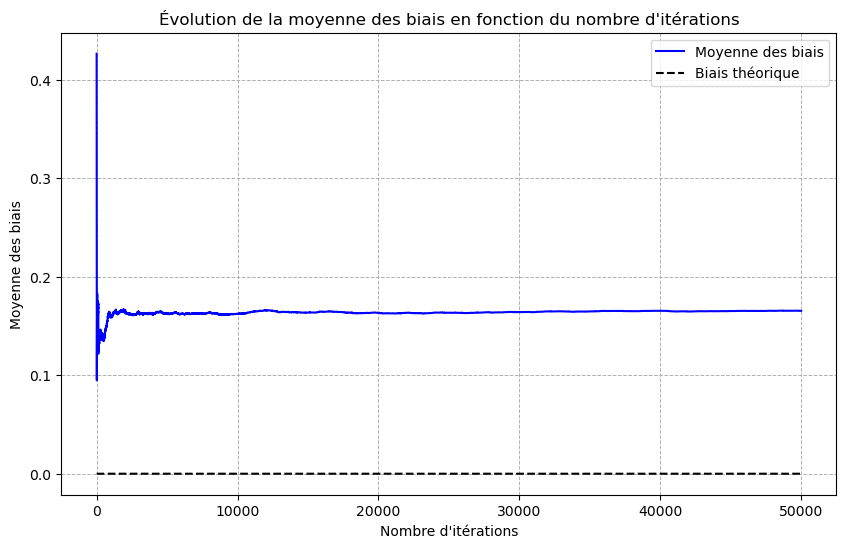

In [165]:
rd.seed(2)

start_2 = tps.time()

abscisse_max_2 = 50000
rodage_2 = 5
m = 10

estimateurs = np.zeros(abscisse_max_2)  # Bias as a function of r
vec_tps_d_arret = np.zeros(abscisse_max_2)  # All stopping times

for r in range(abscisse_max_2):              # k plutôt petit r / abscisse_max_2 ou R ? 
    # Initialize X_0 and Y_0 with 1
    X = np.array([1])
    Y = np.array([1])

    # décale {X_t} et {Y_t}
    U = rd.random()
    X_ = rd.uniform(X[0] - 0.75, X[0] + 0.75)          # proposition pour X : noter X_ peut-être/ noter avec Q(X_0,.)
    if U <= A(X[0], X_):
        X = np.append(X, X_)
    else:
        X = np.append(X, X[0])

    i = 1         # t dans le diapo changer en enlevant l'autre t comme variable muette avec np.mean à la palce de for 
    # Coupling of proposal kernels Q(X_t, .) and Q(Y_{t-1}, .)
    while X[i] != Y[i - 1]:
        
        # début du couplage des chaînes de Metropolis-Hastings 
        U = rd.random()     # U 

        # début du couplage des noyaux de proposition 
        X_ = rd.uniform(X[i] - 0.75, X[i] + 0.75)  
        V = rd.random()             # V
        if V * q(X[i], X_) <= q(Y[i - 1], X_):
            Y_ = X_
        else:
            Y_ = rd.uniform(Y[i - 1] - 0.75, Y[i - 1] + 0.75)
            W = rd.random()                 # W
            while W * q(Y[i - 1], Y_) <= q(X[i], Y_):
                Y_ = rd.uniform(Y[i - 1] - 0.75, Y[i - 1] + 0.75)
                W = rd.random()
        # fin du couplage des noyaux de proposition
        
        if U <= A(X[i], X_):
            X = np.append(X, X_)
        else:
            X = np.append(X, X[i])
        if U <= A(Y[i - 1], Y_):
            Y = np.append(Y, Y_)
        else:
            Y = np.append(Y, Y[i - 1])
        i += 1

    tps_d_arret = i

    while i < m:
        X_ = rd.uniform(X[i] - 0.75, X[i] + 0.75)
        U = rd.random()
        if U <= A(X[i], X_):
            X = np.append(X, X_)
            Y = np.append(Y, X_)
        else:
            X = np.append(X, X[i])
            Y = np.append(Y, Y[i - 1])
        i += 1

    H = np.zeros(m - rodage_2 + 1)  # Vector of H_l(X,Y)          indentation vérifiée
    for l in range(rodage_2, m + 1):  # Calculate H_k:m(X,Y)      indentation vérifiée 
        S = X[l]  # S represents H_l(X,Y)        # S rpz H_l(X,Y)
        if l + 1 <= tps_d_arret - 1:
            for t in range(l + 1, tps_d_arret):
                S += h(X[t]) - h(Y[t - 1])
        H[l - rodage_2] = S

    # Define Hk:m(X, Y)
    estimateurs[r] = np.mean(H) 
    vec_tps_d_arret[r] = tps_d_arret

# Compute the mean of  for each k
ordonnee_biais_1 = [np.mean(estimateurs[0:r]) - mu for r in range(1, abscisse_max_2 + 1)]         # arnaque 
abscisse_2 = np.linspace(1, abscisse_max_2, abscisse_max_2)
ordonnee_nv_0 = np.zeros(abscisse_2.shape)

print(f'tps du programme : {tps.time() - start_2:.4f}')
print(f'les tps d arret vallent : {vec_tps_d_arret}')         
print(f'le dernier Hk:m = {estimateurs[-1]:.4f}')             
print(f'la moyenne des estimateurs est {np.mean(estimateurs):.4f}')
print(f'l\'espérance de h sous pi est {mu:.4f}')
print(f"l' esperance empirique moins mu est {np.mean(estimateurs) - mu}")

plt.figure(figsize=(10, 6))
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.plot(abscisse_2, ordonnee_biais_1, label="Moyenne des biais", color='blue')
plt.plot(abscisse_2, ordonnee_nv_0, color='black', linestyle='--', label='Biais théorique')  # Ligne noire pour le biais théorique
plt.xlabel("Nombre d'itérations")
plt.ylabel("Moyenne des biais")
plt.title("Évolution de la moyenne des biais en fonction du nombre d'itérations")
plt.legend()
plt.show()